In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
!ls '/content/gdrive/My Drive/CMPUT 206 Wi19/Lab9_Files/'
path = '/content/gdrive/My Drive/CMPUT 206 Wi19/Lab9_Files/'
filename = path+'cameraman.png'

cameraman.png  Lab9.ipynb  test.ipynb


# Zigzag scan

In [0]:
# Zigzag scan of a matrix
# Argument is a two-dimensional matrix of any size,
# not strictly a square one.
# Function returns a 1-by-(m*n) array,
# where m and n are sizes of an input matrix,
# consisting of its items scanned by a zigzag method.
#
# Matlab Code:
# Alexey S. Sokolov a.k.a. nICKEL, Moscow, Russia
# June 2007
# alex.nickel@gmail.com

import numpy as np

def zigzag(input):
    #initializing the variables
    #----------------------------------
    h = 0
    v = 0

    vmin = 0
    hmin = 0

    vmax = input.shape[0]
    hmax = input.shape[1]
    
    #print(vmax ,hmax )

    i = 0

    output = np.zeros(( vmax * hmax))
    #----------------------------------

    while ((v < vmax) and (h < hmax)):
    	
        if ((h + v) % 2) == 0:                 # going up
            
            if (v == vmin):
            	#print(1)
                output[i] = input[v, h]        # if we got to the first line

                if (h == hmax):
                    v = v + 1
                else:
                    h = h + 1                        

                i = i + 1

            elif ((h == hmax -1 ) and (v < vmax)):   # if we got to the last column
            	#print(2)
            	output[i] = input[v, h] 
            	v = v + 1
            	i = i + 1

            elif ((v > vmin) and (h < hmax -1 )):    # all other cases
            	#print(3)
            	output[i] = input[v, h] 
            	v = v - 1
            	h = h + 1
            	i = i + 1

        
        else:                                    # going down

        	if ((v == vmax -1) and (h <= hmax -1)):       # if we got to the last line
        		#print(4)
        		output[i] = input[v, h] 
        		h = h + 1
        		i = i + 1
        
        	elif (h == hmin):                  # if we got to the first column
        		#print(5)
        		output[i] = input[v, h] 

        		if (v == vmax -1):
        			h = h + 1
        		else:
        			v = v + 1

        		i = i + 1

        	elif ((v < vmax -1) and (h > hmin)):     # all other cases
        		#print(6)
        		output[i] = input[v, h] 
        		v = v + 1
        		h = h - 1
        		i = i + 1




        if ((v == vmax-1) and (h == hmax-1)):          # bottom right element
        	#print(7)        	
        	output[i] = input[v, h] 
        	break

    #print ('v:',v,', h:',h,', i:',i)
    return output




# Inverse zigzag scan of a matrix
# Arguments are: a 1-by-m*n array, 
# where m & n are vertical & horizontal sizes of an output matrix.
# Function returns a two-dimensional matrix of defined sizes,
# consisting of input array items gathered by a zigzag method.
#
# Matlab Code:
# Alexey S. Sokolov a.k.a. nICKEL, Moscow, Russia
# June 2007
# alex.nickel@gmail.com


def inverse_zigzag(input, vmax, hmax):
	
	#print input.shape

	# initializing the variables
	#----------------------------------
	h = 0
	v = 0

	vmin = 0
	hmin = 0

	output = np.zeros((vmax, hmax))

	i = 0
    #----------------------------------

	while ((v < vmax) and (h < hmax)): 
		#print ('v:',v,', h:',h,', i:',i)   	
		if ((h + v) % 2) == 0:                 # going up
            
			if (v == vmin):
				#print(1)
				
				output[v, h] = input[i]        # if we got to the first line

				if (h == hmax):
					v = v + 1
				else:
					h = h + 1                        

				i = i + 1

			elif ((h == hmax -1 ) and (v < vmax)):   # if we got to the last column
				#print(2)
				output[v, h] = input[i] 
				v = v + 1
				i = i + 1

			elif ((v > vmin) and (h < hmax -1 )):    # all other cases
				#print(3)
				output[v, h] = input[i] 
				v = v - 1
				h = h + 1
				i = i + 1

        
		else:                                    # going down

			if ((v == vmax -1) and (h <= hmax -1)):       # if we got to the last line
				#print(4)
				output[v, h] = input[i] 
				h = h + 1
				i = i + 1
        
			elif (h == hmin):                  # if we got to the first column
				#print(5)
				output[v, h] = input[i] 
				if (v == vmax -1):
					h = h + 1
				else:
					v = v + 1
				i = i + 1
        		        		
			elif((v < vmax -1) and (h > hmin)):     # all other cases
				output[v, h] = input[i] 
				v = v + 1
				h = h - 1
				i = i + 1




		if ((v == vmax-1) and (h == hmax-1)):          # bottom right element
			#print(7)        	
			output[v, h] = input[i] 
			break


	return output

# JPEG Encoder

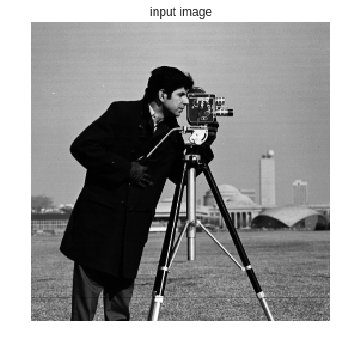

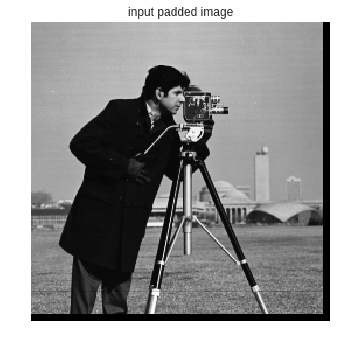

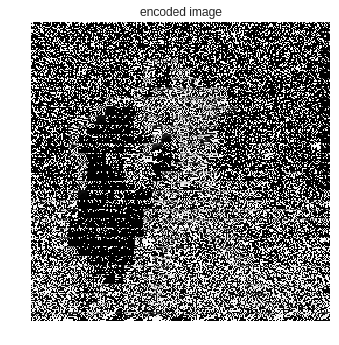

In [4]:
# Jpeg encoding

import numpy as np
import scipy
import matplotlib.pyplot as plt
from skimage import io
from scipy.fftpack import dct,idct  
import copy


# defining block size
block_size = 8

# reading image in grayscale
img = io.imread(filename,as_grey=True)

plt.imshow(img,cmap='gray')
plt.title('input image')
plt.axis('off')
plt.show()

# Compute 2D Discrete Cosine Transform
#reference: https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.fftpack.dct.html
def dct2D(x):
  # apply dct (scipy.fftpack.dct) on x with type 2 and 'ortho' norm. 
  tmp = dct(x,type=2, norm = 'ortho')##### your code here #####
  #transpose tmp
  tmp_transposed = np.transpose(tmp)##### your code here #####
  # apply dct (scipy.fftpack.dct) on tmp_transposed with type 2 and 'ortho' norm. 
  result = dct(tmp_transposed, type=2, norm = 'ortho')##### your code here #####
  #transpose the result
  result_transposed = np.transpose(result) ##### your code here #####
  return result_transposed

# get size of the image
[h , w] = img.shape

##################### step 1 #####################
# compute number of blocks by diving height and width of image by block size
# the number of blocks should be ceiling of the division (image size by block size) to cover the whole image.
# at the end, cast the numbers to int
 
##### your code here ##### # number of blocks in height
nbh = int(np.ceil(h/block_size))

##### your code here ##### # number of blocks in width
nbw = int(np.ceil(w/block_size))

##################### step 2 #####################
# Pad the image, because sometime image size is not dividable to block size
# get the size of padded image by multiplying block size by number of blocks in height/width
##### your code here #####  # height of padded image
H = block_size * nbh
##### your code here #####  # width of padded image
W = block_size * nbw

# create a numpy zero matrix with size of H,W
padded_img = np.zeros((H,W))

# copy the values of img  into padde_img[0:h,0:w]
##### your code here #####
padded_img[0:h, 0:w] = np.copy(img)
#showing padded image
plt.imshow(np.uint8(padded_img),cmap='gray')
plt.title('input padded image')
plt.axis('off')
plt.show()

##################### step 3 #####################
# start encoding:
# divide image into block size by block size (here: 8-by-8) blocks
# To each block apply 2D discrete cosine transform
# reorder DCT coefficients in zig-zag order
# reshaped it back to block size by block size (here: 8-by-8)
# write final result into a txt file


# iterate over blocks
for i in range(nbh):
    
        # Compute start row index of the block
        ##### your code here #####
        row_ind_1 = i * block_size
        
        # Compute end row index of the block
        ##### your code here #####
        row_ind_2 = row_ind_1 + block_size
        
        for j in range(nbw):
            
            # Compute start column index of the block
            col_ind_1 = j * block_size##### your code here #####
            
            # Compute end column index of the block
            col_ind_2 = col_ind_1 + block_size##### your code here #####
            
            # select the current block we want to process using calculated indices
            block = padded_img[ row_ind_1 : row_ind_2 , col_ind_1 : col_ind_2 ]
            
            # complete dct2D function, which is 2D discrete cosine transform,
            # and apply it to the selected block
            DCT = dct2D(block)##### your code here #####
            
            # reorder DCT coefficients in zig zag order by calling zigzag function
            # it will give you a one dimentional array
            reordered = zigzag(DCT)##### your code here #####
            
            # reshape the reorderd array back to (block size by block size) (here: 8-by-8)
            reshaped= np.reshape(reordered, (8,8))##### your code here #####
            
            # copy reshaped matrix into padded_img on current block corresponding indices
            ##### your code here #####
            padded_img[ row_ind_1 : row_ind_2 , col_ind_1 : col_ind_2 ] = copy.deepcopy(reshaped)

plt.imshow(np.uint8(padded_img),cmap='gray')
plt.title('encoded image')
plt.axis('off')
plt.show()
##################### step 4 #####################
# write h, w, block_size and padded_img into txt files at the end of encoding

# write padded_img into 'encoded.txt' file. You can use np.savetxt function.
# first parameter should be path+'encoded.txt'
##### your code here #####
np.savetxt('encode.txt', padded_img)
# write [h, w, block_size] into size.txt. You can use np.savetxt function.
# first parameter should be path+'size.txt'
##### your code here #####
np.savetxt('size.txt', [h,w,block_size])

##################################################




# JPEG Decoder

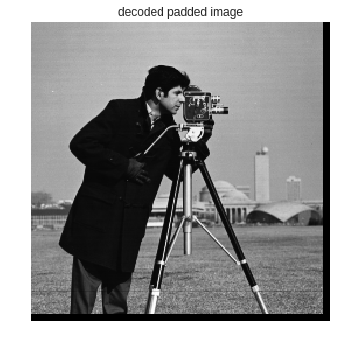

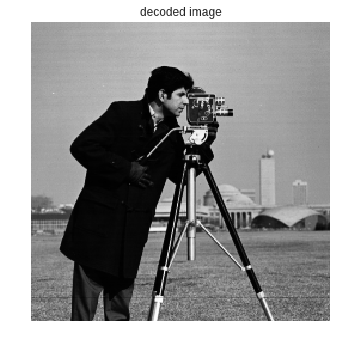

In [5]:
# Jpeg decoding


# Compute 2D Inverse Discrete Cosine Transform
def idct2D(x):
  # apply dct (scipy.fftpack.dct) on x with type 2 and 'ortho' norm. 
  tmp = idct(x,type=2, norm = 'ortho')##### your code here #####
  #transpose tmp
  tmp_transposed = np.transpose(tmp)##### your code here #####
  # apply dct (scipy.fftpack.dct) on tmp_transposed with type 2 and 'ortho' norm. 
  result = idct(tmp_transposed, type=2, norm = 'ortho')##### your code here #####
  #transpose the result
  result_transposed = np.transpose(result) ##### your code here #####
  return result_transposed




##################### step 5 #####################
# load h, w, block_size and padded_img from txt files

# load 'encoded.txt' into padded_img matrix.
# You should use np.loadtxt if you have already used np.savetxt to save them.
##### your code here #####
padded_img = np.loadtxt('encode.txt')


# load 'size.txt' to get [h, w, block_size]
# You should use np.loadtxt if you have already used np.savetxt to save them.
##### your code here #####
[h, w, block_size] = np.loadtxt('size.txt')


#cast h, w and block_size to int
##### your code here #####
##### your code here #####
##### your code here #####
h = np.int(h)
w = np.int(w)
block_size = np.int(block_size)
##################### step 6 #####################
# get the size of padded_img
##### your code here #####
[H, W] = padded_img.shape


# compute number of blocks by diving height and width of image by block size
# cast it to int at the end
# you can copy it from step 1
##### your code here ##### # number of blocks in height
nbh = int(np.ceil(h/block_size))
##### your code here ##### # number of blocks in width
nbw = int(np.ceil(w/block_size)) 

##################### step 7 #####################
# start decoding:
# divide encoded image into block size by block size (here: 8-by-8) blocks
# reshape it to one dimentional array (here: 64)
# use inverse zig-zag to reorder the array into a block
# apply 2D inverse discrete cosine transform

# iterate over blocks
for i in range(nbh):
    
        # Compute start row index of the block, same as encoder
        ##### your code here #####
        row_ind_1 = i * block_size
        
        # Compute end row index of the block, same as encoder
        ##### your code here #####
        row_ind_2 = row_ind_1 + block_size
        for j in range(nbw):
            
            # Compute start column index of the block, same as encoder
            ##### your code here #####
            col_ind_1 = j * block_size
            
            # Compute end column index of the block, same as encoder
            ##### your code here #####
            col_ind_2 = col_ind_1 + block_size
            # select the current block we want to process using calculated indices
            block = padded_img[ row_ind_1 : row_ind_2 , col_ind_1 : col_ind_2 ]
            
            # reshape the 2D block (here: 8-by-8) to one dimentional array (here: 64)
            ##### your code here #####
            reshaped = np.reshape(block, 8*8)
            
            # use inverse_zigzag function to scan and reorder the array into a block
            ##### your code here #####
            reordered = inverse_zigzag(reshaped, block_size, block_size )
            
            # complete idct2D functio , which is 2D inverse discrete cosine transform, 
            # and apply it to the reordered matrix 
            ##### your code here #####
            IDCT = idct2D(reordered) 
            # copy IDCT matrix into padded_img on current block corresponding indices
            ##### your code here #####
            padded_img[ row_ind_1 : row_ind_2 , col_ind_1 : col_ind_2 ] = copy.deepcopy(IDCT)


padded_img = np.uint8(padded_img)

plt.imshow(np.uint8(padded_img),cmap='gray')
plt.title('decoded padded image')
plt.axis('off')
plt.show()
##################### step 8 #####################
# get the original size ( h by w) image from padded_img

##### your code here #####
decoded_img = padded_img[0:np.int(h), 0:np.int(w)]


plt.imshow(np.uint8(decoded_img),cmap='gray')
plt.title('decoded image')
plt.axis('off')
plt.show()
##################################################

